In [2]:
%load_ext autoreload
%autoreload 2
import pandas
import market_efficiency.main as main
import market_efficiency.generating_method as generating_method
import market_efficiency.method as method
import matplotlib.pyplot as plt
import numpy as np
import pickle

data = pandas.read_csv("data_2020.csv")
data = data.dropna()
data['results'] = main.getResults(data)
print(data['results'],data['HSC'],data['ASC'])

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


ModuleNotFoundError: No module named 'market_efficiency'

In [3]:
Methods = ['basic','or','shin','power','wpo']
HOMEWIN = 2
AWAYWIN = 1
DRAW = 0
fair = True
closed_odds = np.ones((5,len(data['results']),3))
starting_odds = np.ones(closed_odds.shape)
generating = generating_method.GeneratingMethod(data=data,bet_choices=3)
for i in range(len(Methods)):
    closed_odds[i] =  generating.find_fair_odds(method=Methods[i],odds_columns=method.CLOSED)
    starting_odds[i] = generating.find_fair_odds(method=Methods[i],odds_columns=method.START)
unfair_closed_odds = generating.find_odds(odds_columns=method.CLOSED)
unfair_open_odds = generating.find_odds(odds_columns=method.START)
odds = np.array([closed_odds,starting_odds])


In [11]:
Descriptions = ["closed","starting"]
print(np.sum(main.randomSingle(data,HOMEWIN,odds=unfair_open_odds)))
"""for j in range(len(Methods)):
    fig,axs = plt.subplots(1,2)
    for i,closed in enumerate([True,False]):
        data['home'] = main.randomSingle(data,HOMEWIN,odds=odds[i,j])
        data['away'] = main.randomSingle(data,AWAYWIN,odds=odds[i,j])    
        data['draw'] = main.randomSingle(data,DRAW,odds=odds[i,j])
        data['favourite'] = main.betFavourite(data,odds=odds[i,j])
        data['underdog'] = main.betUnderdog(data,odds=odds[i,j])
        des =  Descriptions[i] + ", " + Methods[j]
        axs[i].set_xlabel(des)
        data[['home','away','draw','favourite','underdog']].cumsum().plot(ax=axs[i])
    plt.savefig(Methods[j]+".png")"""

-978.9726000000003


'for j in range(len(Methods)):\n    fig,axs = plt.subplots(1,2)\n    for i,closed in enumerate([True,False]):\n        data[\'home\'] = main.randomSingle(data,HOMEWIN,odds=odds[i,j])\n        data[\'away\'] = main.randomSingle(data,AWAYWIN,odds=odds[i,j])    \n        data[\'draw\'] = main.randomSingle(data,DRAW,odds=odds[i,j])\n        data[\'favourite\'] = main.betFavourite(data,odds=odds[i,j])\n        data[\'underdog\'] = main.betUnderdog(data,odds=odds[i,j])\n        des =  Descriptions[i] + ", " + Methods[j]\n        axs[i].set_xlabel(des)\n        data[[\'home\',\'away\',\'draw\',\'favourite\',\'underdog\']].cumsum().plot(ax=axs[i])\n    plt.savefig(Methods[j]+".png")'

In [14]:
subintervals = 50
print("over-all dataset kl-distance is: {0:.3f}".format(main.kl_divergence(data,closed=True,margin=Methods[0])))
print("over-all dataset kl-distance is: {0:.3f}".format(main.kl_divergence(data,closed=False,margin=Methods[0])))


1.0071787299685915
over-all dataset kl-distance is: 0.083
1.01201252908345
over-all dataset kl-distance is: 0.079


In [11]:
lin,log = main.regression(data,odds[1,0])
print(lin,log)


1.0 0.8306209124294177


[0.         0.         0.         0.         0.         0.
 0.         0.         0.17271529 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

{'whiskers': [<matplotlib.lines.Line2D at 0x1f3072c02e8>,
 'caps': [<matplotlib.lines.Line2D at 0x1f308155780>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f30813ecc0>],
 'medians': [<matplotlib.lines.Line2D at 0x1f308155e10>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f308155ef0>],
 'means': []}

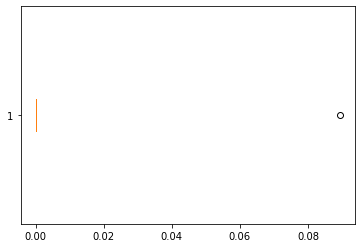

In [10]:
bettor_count = 150
bankrolls_closed,iteration_closed = main.bettorsWithBankroll(data,count=bettor_count,fraction=1/5,bankroll=10,
                                               iterations=400,threshold=1/100,odds=unfair_closed_odds)
bankrolls_open,iteration_open = main.bettorsWithBankroll(data,count=bettor_count,fraction=1/5,bankroll=10,
                                               iterations=400,threshold=1/100,odds=unfair_open_odds)
print(bankrolls_closed)
plt.boxplot(bankrolls_open,vert=False)